In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
path = "//Volumes/data_files/UKB_data/immune_result/cox2/Enrichr/SLE"
# GO_Biological_Process_2023_table.txt 
# GO_Cellular_Component_2023_table.txt KEGG_2021_Human_table.txt
# GO_Molecular_Function_2023_table.txt Reactome_Pathways_2024_table.txt

go_bp = pd.read_csv(f"{path}/GO_Biological_Process_2023_table.txt", sep="\t")
go_cc = pd.read_csv(f"{path}/GO_Cellular_Component_2023_table.txt", sep="\t")
go_mf = pd.read_csv(f"{path}/GO_Molecular_Function_2023_table.txt", sep="\t")
kegg = pd.read_csv(f"{path}/KEGG_2021_Human_table.txt", sep="\t")
reactome = pd.read_csv(f"{path}/Reactome_Pathways_2024_table.txt", sep="\t")

In [18]:

def clean_enrichr_data(df):
    df['Significant'] = df['Adjusted P-value'] < 0.05  # 判断显著性
    df = df[df['Significant']]  # 仅保留显著性结果
    df['Observed Proteins'] = df['Overlap'].str.split('/').str[0].astype(int)  # 提取观察到的蛋白质数量
    df["Term"] = df["Term"].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x))
    # df = df.sort_values('Adjusted P-value').head(10)
    df = df.sort_values('Adjusted P-value').head(5)
    df['Term'] = pd.Categorical(df['Term'], categories=df['Term'], ordered=True)
    
    return df



In [19]:
go_bp = clean_enrichr_data(go_bp)
go_cc = clean_enrichr_data(go_cc)
go_mf = clean_enrichr_data(go_mf)
kegg = clean_enrichr_data(kegg)
reactome = clean_enrichr_data(reactome)
go_bp['group'] = 'GO_BP'
go_cc['group'] = 'GO_CC'
go_mf['group'] = 'GO_MF'
kegg['group'] = 'KEGG'
reactome['group'] = 'Reactome'

# 拼接所有数据框
combined_df = pd.concat([go_bp, go_cc, go_mf, kegg, reactome], ignore_index=True)
# combined_df = pd.concat([go_bp, go_cc, go_mf, reactome], ignore_index=True)
combined_df['-log10(Adjusted P-value)'] = -np.log10(combined_df['Adjusted P-value'])
combined_df

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Significant,Observed Proteins,group,-log10(Adjusted P-value)
0,Inflammatory Response,41/108,3.975811e-08,1.028542e-04,0,0,3.281218,55.913443,SERPINA3;CSF1R;ORM1;CXCL9;CCL11;CXCL8;ADM;CXCL...,True,41,GO_BP,3.987778
1,Regulation Of T Cell Proliferation,24/49,1.103688e-07,1.245626e-04,0,0,5.044706,80.813355,CD86;IL10;CD274;VCAM1;IL15;CD70;CD80;PLA2G2A;L...,True,24,GO_BP,3.904612
2,Negative Regulation Of T Cell Activation,17/28,1.444483e-07,1.245626e-04,0,0,8.045650,126.721750,CD86;IL10;CD274;CD80;FGL1;PLA2G2A;LILRB1;PDCD1...,True,17,GO_BP,3.904612
3,Positive Regulation Of ERK1 And ERK2 Cascade,34/86,1.945918e-07,1.258522e-04,0,0,3.473103,53.667639,CSF1R;SEMA7A;CCL11;CXCL17;TREM2;TNFRSF11A;TNF;...,True,34,GO_BP,3.900139
4,Negative Regulation Of Cytokine Production,27/61,2.471901e-07,1.277673e-04,0,0,4.184791,63.663678,CD274;ORM1;TREM2;TNF;DLL1;CX3CL1;IFNL1;IL12B;L...,True,27,GO_BP,3.893580
5,Vacuolar Lumen,30/81,5.216408e-06,9.650355e-04,0,0,3.098299,37.686783,SCARB2;SERPINA3;GRN;CTSV;IFI30;MPO;CTSS;SGSH;G...,True,30,GO_CC,3.015457
6,Lytic Vacuole,23/61,4.858486e-05,4.494100e-03,0,0,3.156579,31.351769,ARSA;GRN;TINAGL1;RNASET2;CTSZ;CTSV;IFI30;MPO;C...,True,23,GO_CC,2.347357
7,Lysosomal Lumen,20/52,1.098283e-04,6.772747e-03,0,0,3.246490,29.596927,SCARB2;ARSA;CD74;CTSV;IFI30;CTSS;SGSH;GM2A;TCN...,True,20,GO_CC,2.169235
8,Collagen-Containing Extracellular Matrix,51/198,4.143057e-04,1.916164e-02,0,0,1.839097,14.324552,LGALS3BP;COL18A1;SERPINA3;ORM1;TINAGL1;CTSZ;TN...,True,51,GO_CC,1.717567
9,Azurophil Granule,21/62,5.823795e-04,2.154804e-02,0,0,2.656319,19.785298,ARSA;PIGR;SERPINA3;GRN;B4GALT1;NHLRC3;RNASET2;...,True,21,GO_CC,1.666592


In [20]:
explain_df = combined_df[['Term','group']]
explain_df

,Term,group
0,Inflammatory Response,GO_BP
1,Regulation Of T Cell Proliferation,GO_BP
2,Negative Regulation Of T Cell Activation,GO_BP
3,Positive Regulation Of ERK1 And ERK2 Cascade,GO_BP
4,Negative Regulation Of Cytokine Production,GO_BP
5,Vacuolar Lumen,GO_CC
6,Lytic Vacuole,GO_CC
7,Lysosomal Lumen,GO_CC
8,Collagen-Containing Extracellular Matrix,GO_CC
9,Azurophil Granule,GO_CC


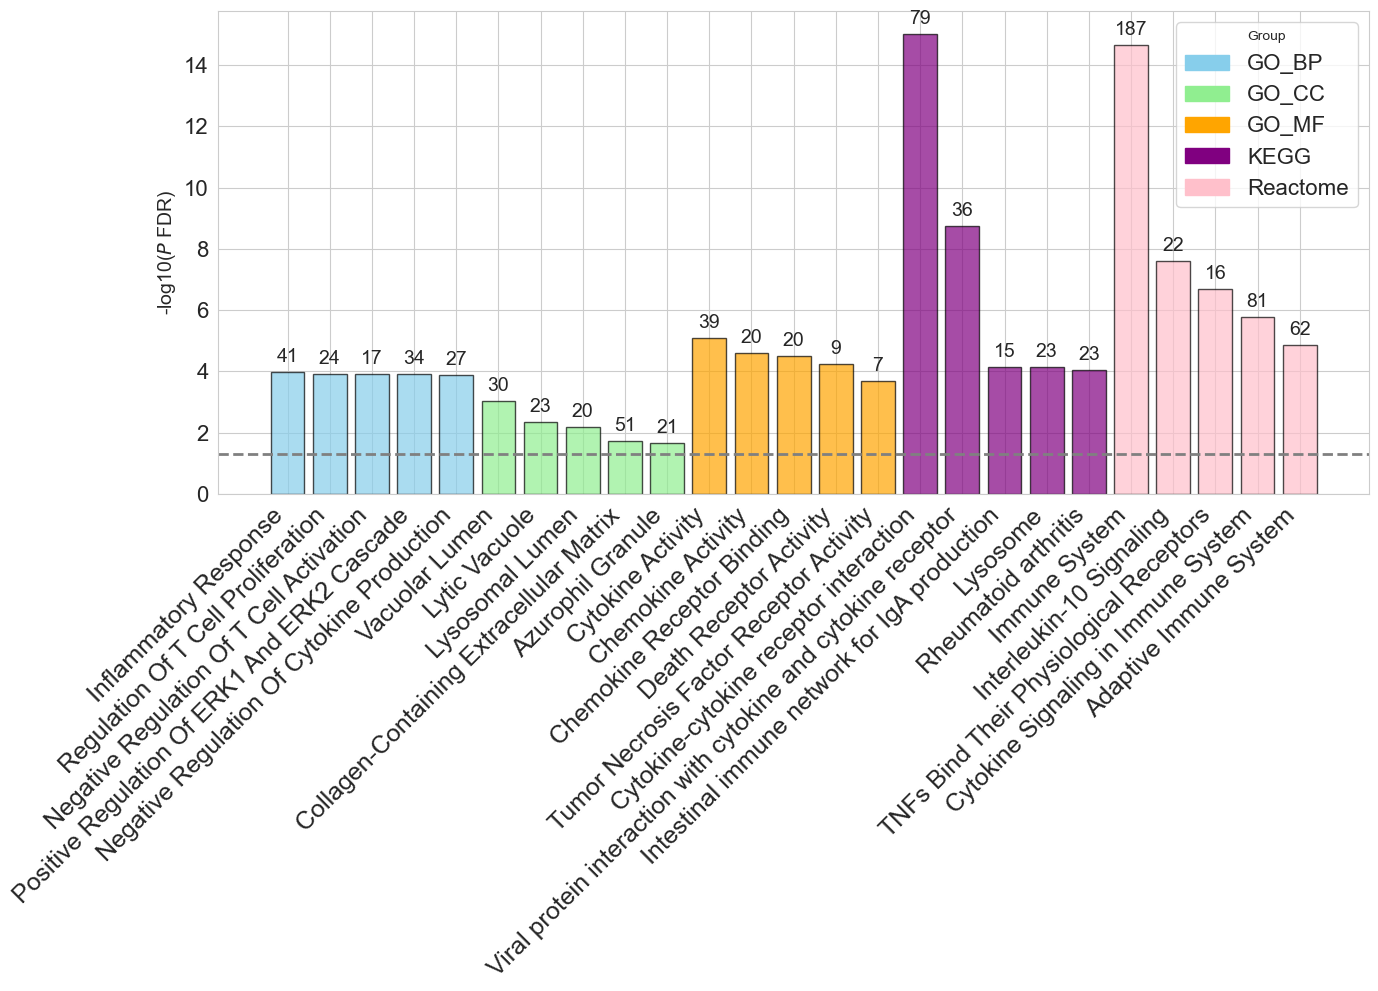

In [26]:
import matplotlib.pyplot as plt

def resolve_duplicates(terms):
    counts = {}
    unique_terms = []
    for term in terms:
        if term in counts:
            counts[term] += 1
            unique_terms.append(f"{term} ({counts[term]})")
        else:
            counts[term] = 1
            unique_terms.append(term)
    return unique_terms

# 修改 combined_df 的 Term 列，避免重名
combined_df['Unique_Term'] = resolve_duplicates(combined_df['Term'])

# 颜色映射（为每个组定义颜色）
group_colors = {
    'GO_BP': 'skyblue',
    'GO_CC': 'lightgreen',
    'GO_MF': 'orange',
    'KEGG': 'purple',
    'Reactome': 'pink'
}

# 获取颜色列表
bar_colors = combined_df['group'].map(group_colors)

# 绘制柱状图
plt.figure(figsize=(14, 10))  # 增加图的宽高，避免拥挤
bars = plt.bar(
    combined_df['Unique_Term'],  # 使用去重后的 Term
    combined_df['-log10(Adjusted P-value)'],
    color=bar_colors,
    edgecolor='black',
    alpha=0.7
)

# 添加每个条的观察到蛋白质数量
for bar, proteins in zip(bars, combined_df['Observed Proteins']):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.2,  # 更高于柱条顶部，避免重叠
        str(proteins),
        ha='center',
        va='bottom',
        fontsize=14,  # 减小字体大小以避免挤占空间
    )

# 添加显著性虚线
# 设定阈值为 -log10(0.05) ≈ 1.3，这表示 P-value < 0.05
significance_threshold = 1.3
plt.axhline(y=significance_threshold, color='grey', linestyle='--', linewidth=2)

# 添加图例
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in group_colors.values()]
labels = group_colors.keys()
plt.legend(handles, labels, title='Group', loc='upper right', fontsize=16)

# 调整 X 轴标签
plt.xticks(
    ticks=range(len(combined_df['Unique_Term'])),  # 保证每个Term有一个刻度
    labels=combined_df['Unique_Term'],
    rotation=45,  # 旋转以适应空间
    ha='right',
    fontsize=18
)

plt.yticks(fontsize=16)

# 图形美化
plt.ylabel(r'-log10($\it{P}$ FDR)', fontsize=14)
# plt.xlabel('GO Term', fontsize=14)
# plt.title('Top Significant GO Terms by -log10(Adjusted P-value)', fontsize=16)

# 调整布局
plt.tight_layout()  # 自动调整布局以减少重叠

# 保存图形
plt.savefig(
    '/Volumes/data_files/UKB_data/immune_result/cox2/Enrichr/SLE/enrichr.pdf',
    format='pdf',
    bbox_inches='tight'
)
